### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import kurtosis
from scipy.stats import skew

import seaborn as sns
from matplotlib import pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

#### Q. Consider only the below columns and prepare a prediction model for predicting Price.

**Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]**

In [14]:
toyota = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [15]:
toyota.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [16]:
toyota.drop(columns=['Id', 'Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic',
                     'Cylinders','Mfr_Guarantee','BOVAG_Guarantee', 'Guarantee_Period','ABS', 
                     'Airbag_1','Airbag_2','Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
                     'Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model',
                     'Backseat_Divider','Metallic_Rim','Radio_cassette', 'Tow_Bar'],axis = 1, inplace = True)
toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [18]:
# Renaming Columns
toyota=toyota.rename({'Age_08_04':'age', 'Quarterly_Tax':'QT'},axis=1)
toyota.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### EDA

In [19]:
toyota.shape

(1436, 9)

In [20]:
toyota.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [21]:
toyota.dtypes

Price     int64
age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [22]:
toyota.duplicated().sum()

1

In [27]:
toyota.drop_duplicates(inplace=True)

In [28]:
toyota.duplicated().sum()

0

In [30]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [31]:
toyota.describe()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [33]:
print(kurtosis(toyota.Price))

3.712607224817697


In [34]:
print(skew(toyota.Price))

1.6948046387085465


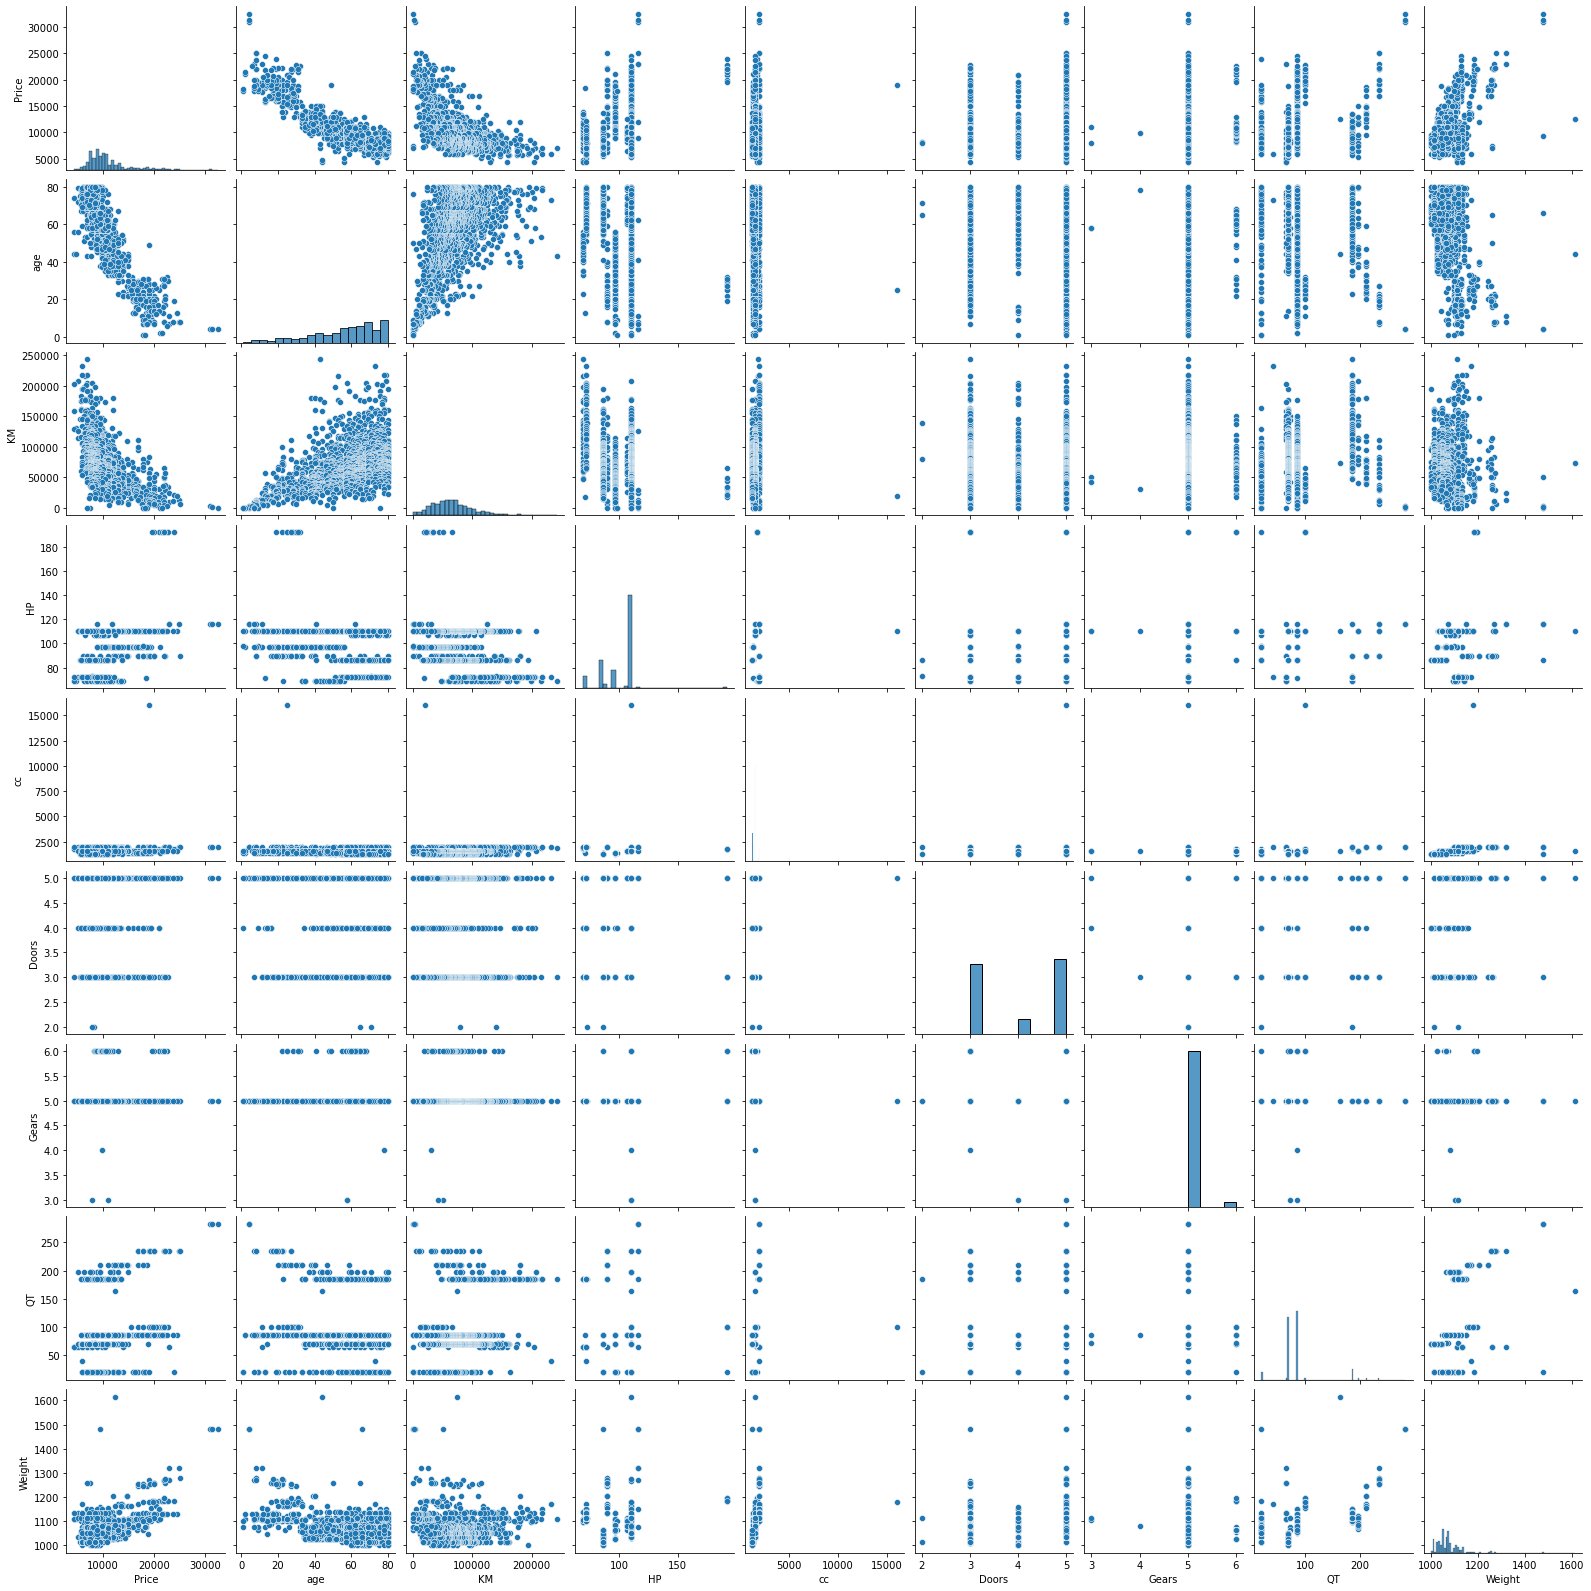

In [37]:
sns.pairplot(toyota)
plt.show()

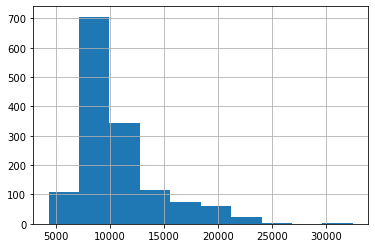

In [39]:
toyota['Price'].hist()
plt.show()

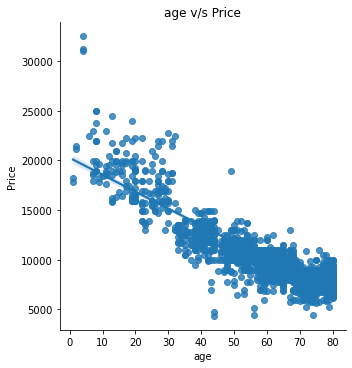

In [41]:
#As age increases, price decreases
sns.lmplot(x='age',y='Price',data=toyota)
plt.title('age v/s Price')
plt.show()

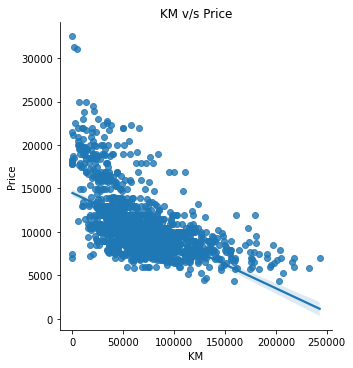

In [43]:
#As accumulated km in odometer increases, price decreases
sns.lmplot(x='KM',y='Price',data=toyota)
plt.title('KM v/s Price')
plt.show()

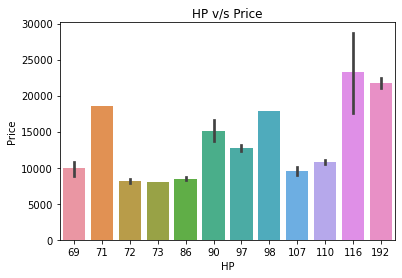

In [61]:
#Vehicle having HP 116 is having highest price
sns.barplot(x='HP',y='Price',data=toyota)
plt.title('HP v/s Price')
plt.show()

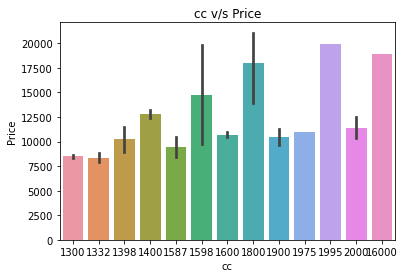

In [59]:
#Vehicle of 1995 cc is having highest price
sns.barplot(x='cc',y='Price',data=toyota)
plt.title('cc v/s Price')
plt.show()

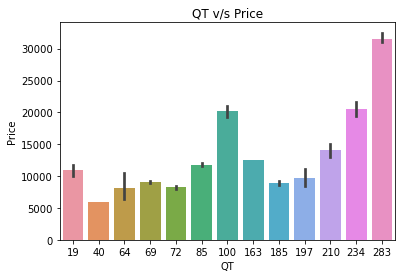

In [62]:
sns.barplot(x='QT',y='Price',data=toyota)
plt.title('QT v/s Price')
plt.show()

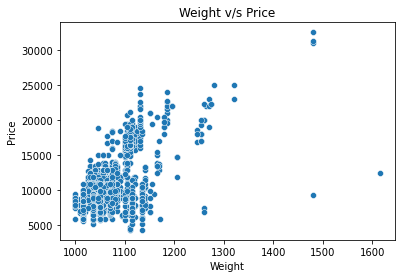

In [65]:
#Weight is nearly directly proportional to Price
sns.scatterplot(x='Weight',y='Price',data=toyota)
plt.title('Weight v/s Price')
plt.show()

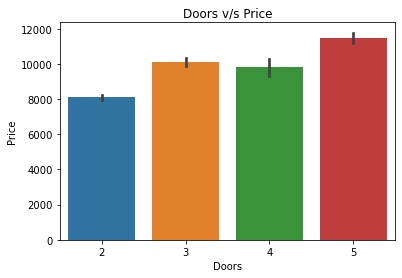

In [67]:
# 5 doors vehicle is having more price
sns.barplot(x='Doors',y='Price',data=toyota)
plt.title('Doors v/s Price')
plt.show()

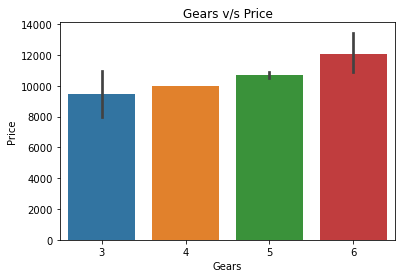

In [71]:
#As number of Gears increase, Price increases
sns.barplot(x='Gears',y='Price',data=toyota)
plt.title('Gears v/s Price')
plt.show()

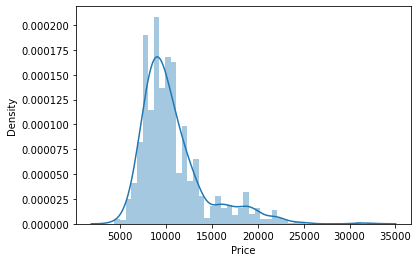

In [73]:
#Profit is right skew
sns.distplot(toyota['Price'])
plt.show()

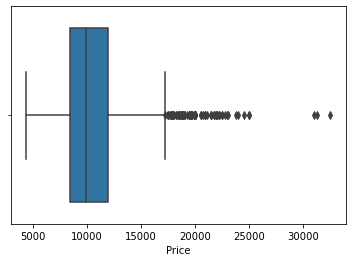

In [74]:
sns.boxplot(toyota['Price'])
plt.show()

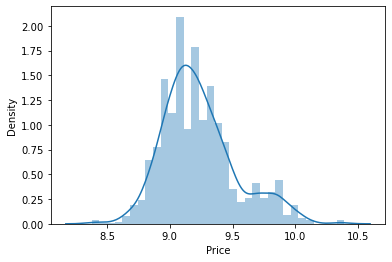

In [75]:
sns.distplot(np.log(toyota['Price']))
plt.show()

### Correlation

In [76]:
corr_data = toyota.corr()
corr_data

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


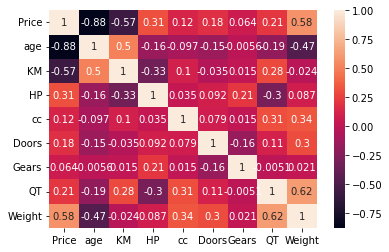

In [78]:
#No multicollinearity
plt.figure(figsize = (6,4))
sns.heatmap(data = corr_data,annot = True)
plt.show()

### Model Building

In [80]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit()
model

In [81]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1431     8794.255037
1432     8292.577342
1433     8455.434402
1434     8579.222041
1435    10396.087526
Length: 1435, dtype: float64

In [82]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [83]:
toyota['Prediction'] = model.fittedvalues
toyota['Prediction_manual']=(-5472.540368)+(-121.713891* toyota['age'])+(-0.020737*toyota['KM'])+(31.584612 * toyota['HP'])+(-0.118558*toyota['cc'])+(-0.920189*toyota['Doors'])+(597.715894*toyota['Gears'])+(3.858805*toyota['QT'])+(16.855470*toyota['Weight'])
toyota['Error']=model.resid
toyota

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,16791.981040,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,16253.835153,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,16779.654824,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,16405.812049,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,16200.235335,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,8794.255037,8794.264655,-1294.255037
1432,10845,72,19000,86,1300,3,5,69,1015,8292.577342,8292.586210,2552.422658
1433,8500,71,17016,86,1300,3,5,69,1015,8455.434402,8455.442309,44.565598
1434,7250,70,16916,86,1300,3,5,69,1015,8579.222041,8579.229900,-1329.222041


In [84]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.875273
age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


* **Null Hypothesis = The independe variales are not significant(pvalue>0.05).**
* **Alternate Hypothesis = The independent variables are significant(pvalue<0.05).**

In [85]:
model.pvalues

Intercept     1.113392e-04
age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64

**Since all p values are<0.05, the independent variables are significant to predict the dependent variable.**

In [86]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [87]:
m_age = smf.ols('Price~age',data=toyota).fit()
print(m_age.tvalues,'\n',m_age.pvalues)

Intercept    138.818198
age          -68.846693
dtype: float64 
 Intercept    0.0
age          0.0
dtype: float64


In [88]:
m_km = smf.ols('Price~KM',data=toyota).fit()
print(m_km.tvalues,'\n',m_km.pvalues)

Intercept    88.643156
KM          -26.221579
dtype: float64 
 Intercept     0.000000e+00
KM           4.117214e-124
dtype: float64


In [89]:
m_hp = smf.ols('Price~HP',data=toyota).fit()
print(m_hp.tvalues,'\n',m_hp.pvalues)

Intercept     4.906904
HP           12.525607
dtype: float64 
 Intercept    1.031004e-06
HP           3.123394e-34
dtype: float64


In [90]:
m_cc = smf.ols('Price~cc',data=toyota).fit()
print(m_cc.tvalues,'\n',m_cc.pvalues)

Intercept    24.879592
cc            4.745039
dtype: float64 
 Intercept    7.236022e-114
cc            2.292856e-06
dtype: float64


In [91]:
m_Doors = smf.ols('Price~Doors',data=toyota).fit()
print(m_Doors.tvalues,'\n',m_Doors.pvalues)

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


In [92]:
m_Gears = smf.ols('Price~Gears',data=toyota).fit()
print(m_Gears.tvalues,'\n',m_Gears.pvalues)

Intercept    1.805193
Gears        2.421261
dtype: float64 
 Intercept    0.071254
Gears        0.015590
dtype: float64


In [93]:
m_QT = smf.ols('Price~QT',data=toyota).fit()
print(m_QT.tvalues,'\n',m_QT.pvalues)

Intercept    41.593196
QT            8.191956
dtype: float64 
 Intercept    1.214615e-248
QT            5.633141e-16
dtype: float64


In [94]:
m_Weight = smf.ols('Price~Weight',data=toyota).fit()
print(m_Weight.tvalues,'\n',m_Weight.pvalues)

Intercept   -19.937904
Weight       26.664730
dtype: float64 
 Intercept     2.951487e-78
Weight       1.547077e-127
dtype: float64


In [95]:
m = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit()
print(m.tvalues,'\n',m.pvalues)

Intercept    -3.875273
age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64


In [97]:
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_age = 1/(1-(rsq_age))

rsq_km = smf.ols('KM~age+HP+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_km = 1/(1-(rsq_km))

rsq_hp = smf.ols('HP~KM+age+cc+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_hp = 1/(1-(rsq_hp))

rsq_cc = smf.ols('cc~KM+HP+age+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_cc = 1/(1-(rsq_cc))

rsq_Doors = smf.ols('Doors~KM+HP+cc+age+Gears+QT+Weight',data=toyota).fit().rsquared
vif_Doors = 1/(1-(rsq_Doors))

rsq_Gears = smf.ols('Gears~KM+HP+cc+Doors+age+QT+Weight',data=toyota).fit().rsquared
vif_Gears = 1/(1-(rsq_Gears))

rsq_QT = smf.ols('QT~KM+HP+cc+Doors+Gears+age+Weight',data=toyota).fit().rsquared
vif_QT = 1/(1-(rsq_QT))

rsq_Weight = smf.ols('Weight~KM+HP+cc+Doors+Gears+QT+age',data=toyota).fit().rsquared
vif_Weight = 1/(1-(rsq_Weight))


df={'Variables':['age','KM','HP','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
vif_frame=pd.DataFrame(df)
vif_frame

,Variables,VIF
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


### Residual analysis

#### Test for Normality of residuals(Q-Q plot)

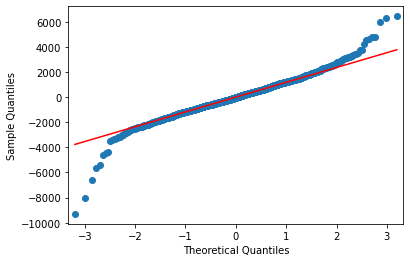

In [98]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title=('Normal Q-Q plot')
plt.show()

In [99]:
list(np.where(model.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959], dtype=int64)]

<AxesSubplot:>

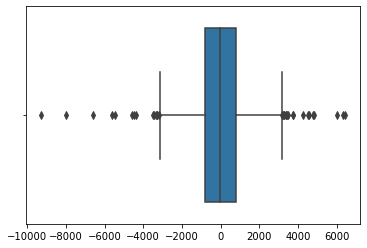

In [100]:
sns.boxplot(model.resid)

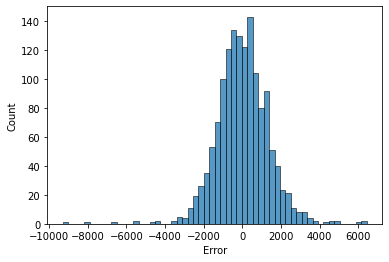

In [101]:
sns.histplot(toyota['Error'])
plt.show()

<AxesSubplot:xlabel='Error', ylabel='Density'>

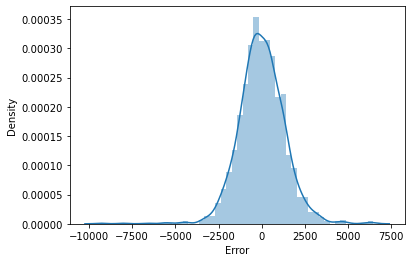

In [102]:
sns.distplot(toyota['Error'])

### Residual plot for Homoscedasticity

In [103]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()

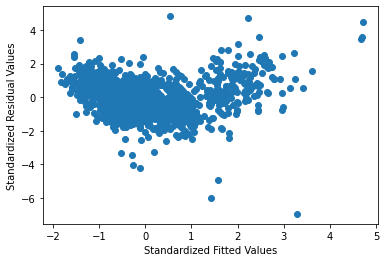

In [104]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

#plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [105]:
get_standardized_values(model.resid).mean()

8.97462514679569e-18

### Residuals V/s Regressors

eval_env: 1


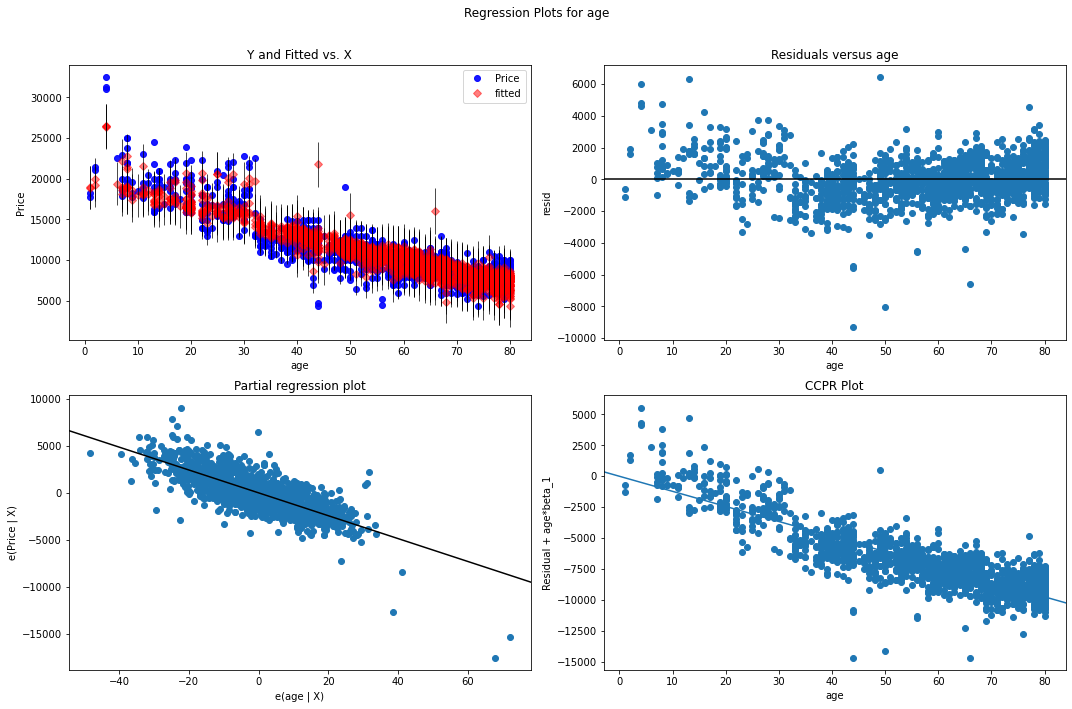

In [106]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'age',fig=fig)

eval_env: 1


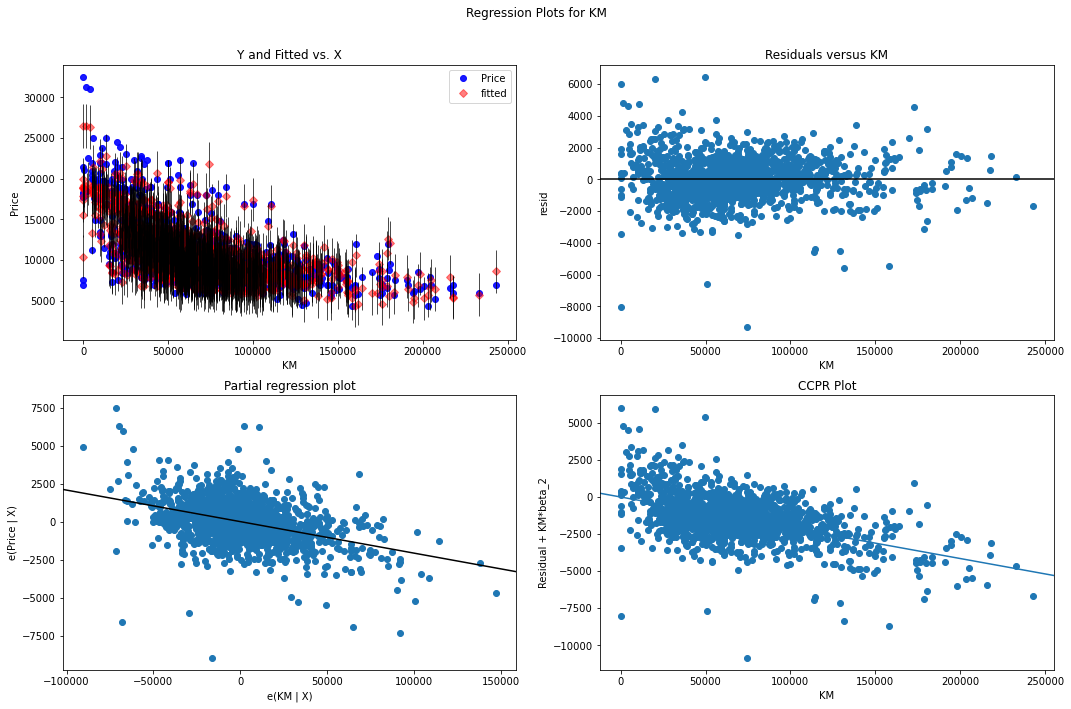

In [107]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)

eval_env: 1


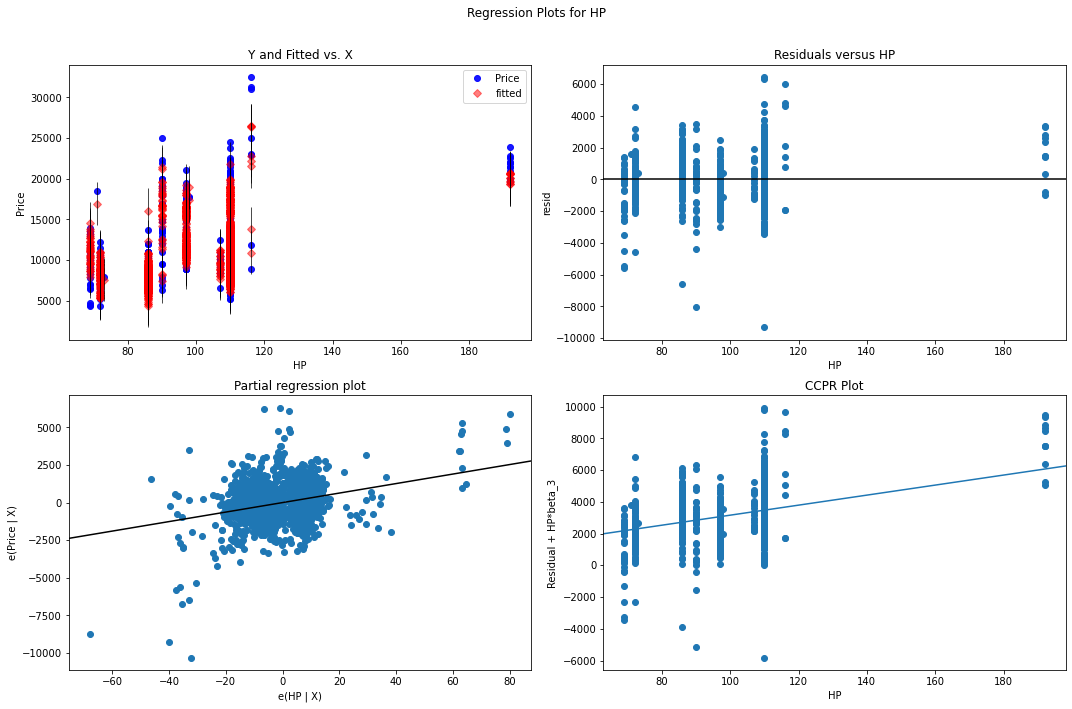

In [108]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)

eval_env: 1


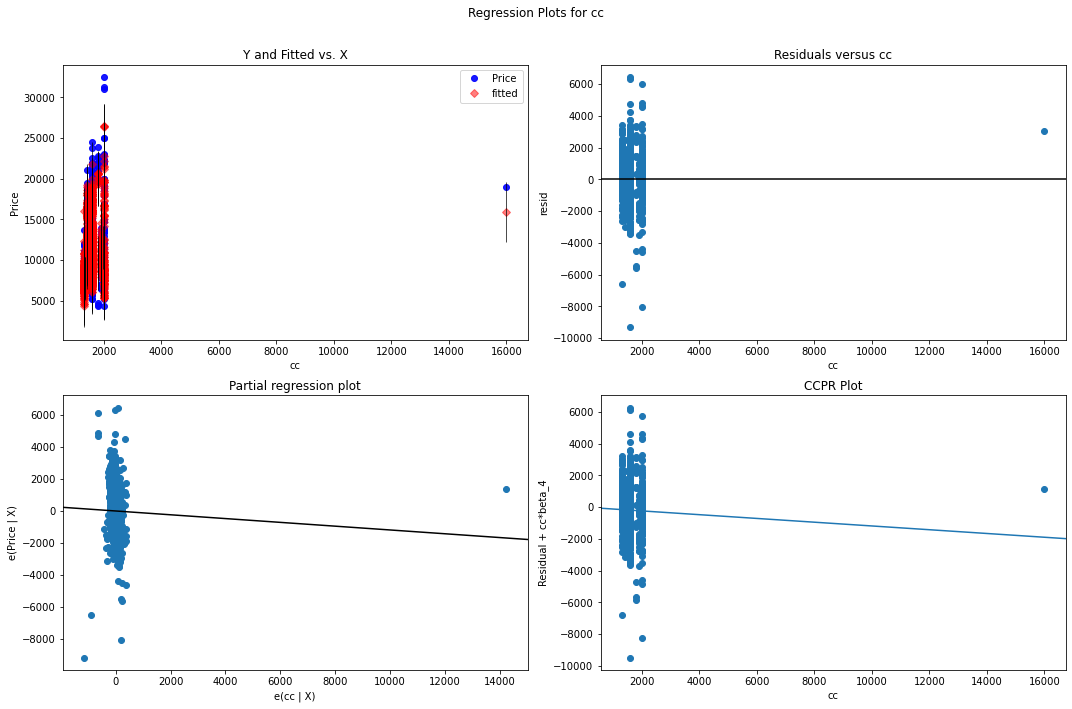

In [109]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)

eval_env: 1


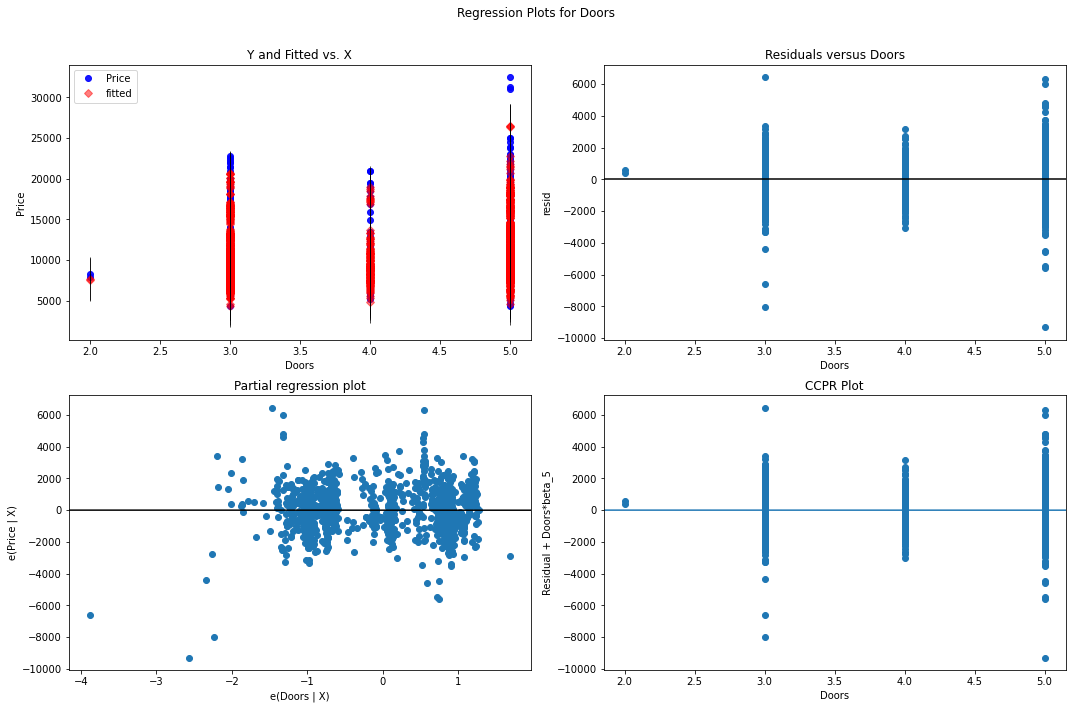

In [110]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)

eval_env: 1


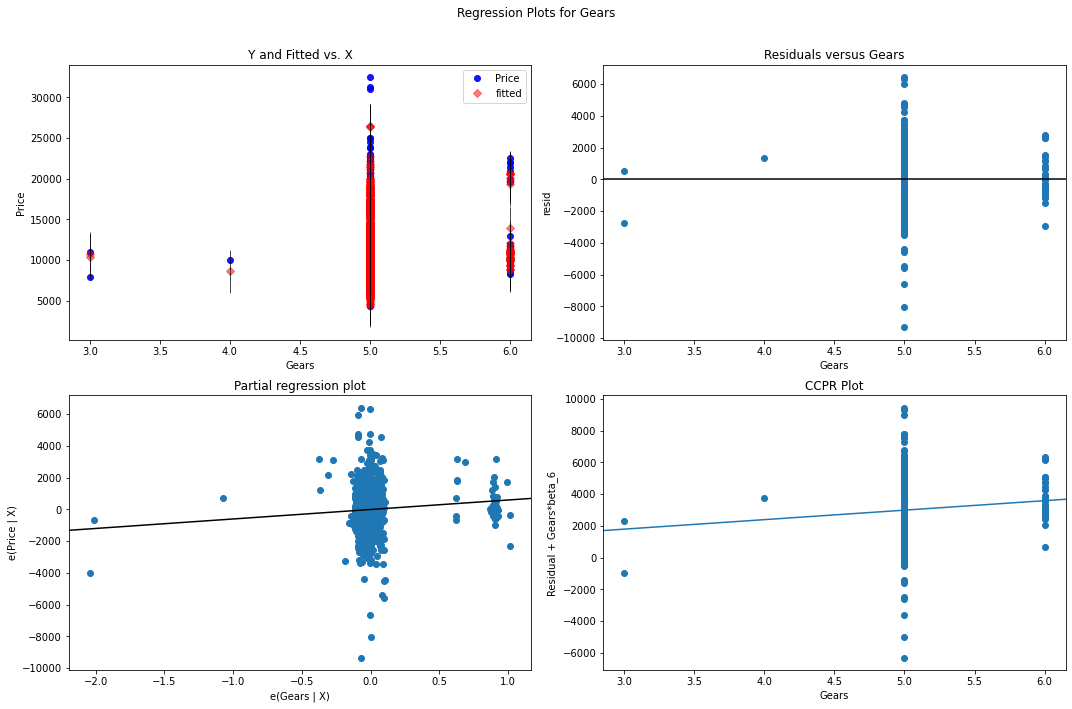

In [111]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)

eval_env: 1


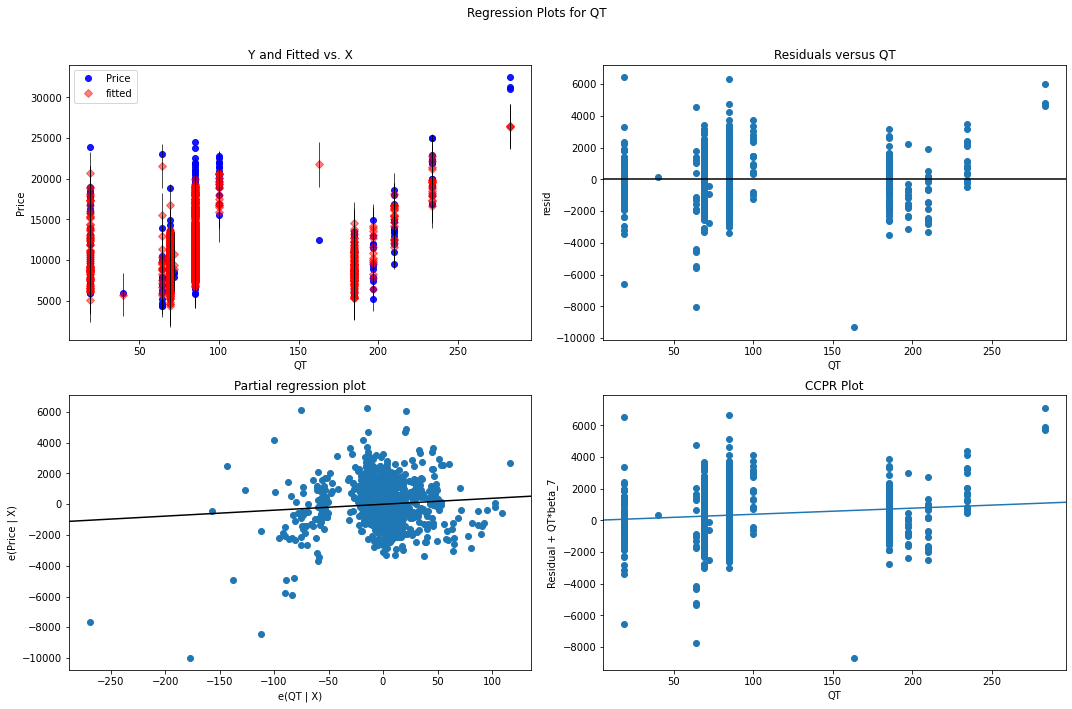

In [112]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'QT',fig=fig)

eval_env: 1


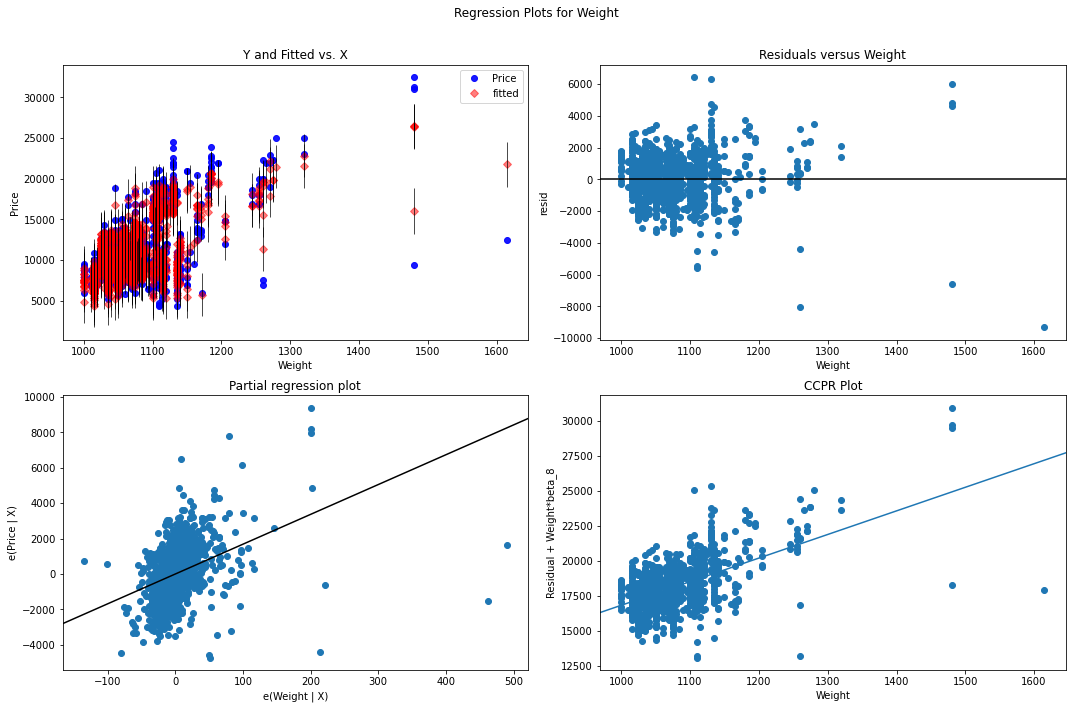

In [113]:
fig = plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

In [114]:
toyota.shape

(1435, 12)

In [115]:
model.influence=model.get_influence()
(c,_) = model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

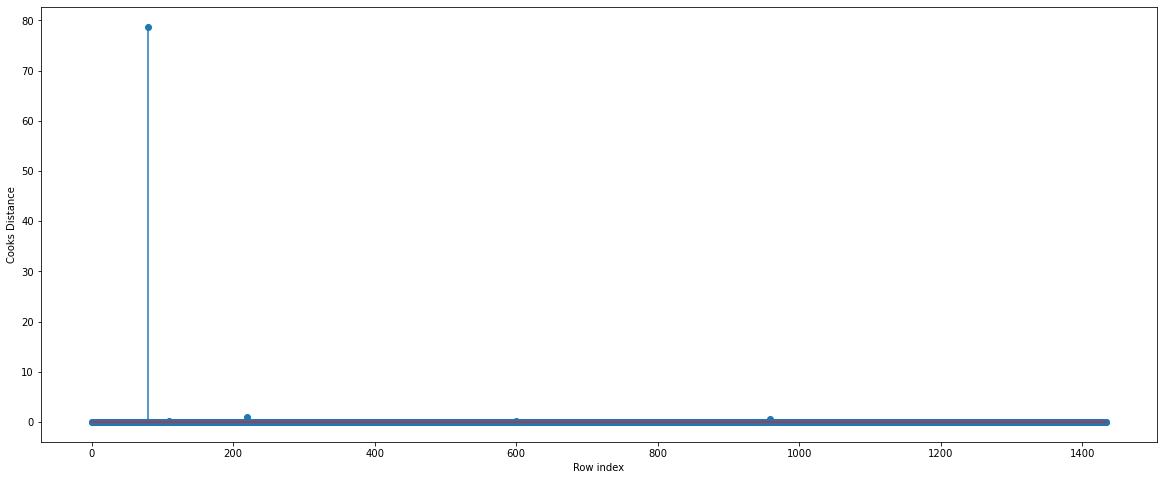

In [116]:
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(toyota)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [117]:
(np.argmax(c),np.max(c))

(80, 78.72950582247552)

### High Influence points

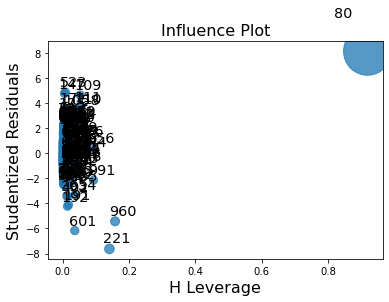

In [118]:
influence_plot(model)
plt.show()

In [120]:
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.027177700348432057

In [122]:
toyota[toyota.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
80,18950,25,20019,110,16000,5,5,100,1180,15906.167549,15906.171299,3043.832451


In [123]:
toyota.head()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,16791.981040,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,16253.835153,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,16779.654824,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,16405.812049,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,16200.235335,-2450.217277


In [124]:
toyota1 = toyota.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
toyota1

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,16791.981040,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,16253.835153,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,16779.654824,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,16405.812049,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,16200.235335,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025,8794.255037,8794.264655,-1294.255037
1430,10845,72,19000,86,1300,3,5,69,1015,8292.577342,8292.586210,2552.422658
1431,8500,71,17016,86,1300,3,5,69,1015,8455.434402,8455.442309,44.565598
1432,7250,70,16916,86,1300,3,5,69,1015,8579.222041,8579.229900,-1329.222041


In [126]:
while np.max(c)>0.03:
    model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota1).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota1 = toyota1.drop(toyota1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota1
else:
    final_model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyota1).fit()
    final_model.rsquared, final_model.aic
    print('Thus model accuracy is improved to', final_model.rsquared)

Thus model accuracy is improved to 0.8968403506948497


In [127]:
final_model.rsquared

0.8968403506948497

In [128]:
toyota1

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
0,13500,23,46986,90,2000,3,5,210,1165,16791.958871,16791.981040,-3291.958871
1,13750,23,72937,90,2000,3,5,210,1165,16253.800414,16253.835153,-2503.800414
2,13950,24,41711,90,2000,3,5,210,1165,16779.635210,16779.654824,-2829.635210
3,14950,26,48000,90,2000,3,5,210,1165,16405.789389,16405.812049,-1455.789389
4,13750,30,38500,90,2000,3,5,210,1170,16200.217277,16200.235335,-2450.217277
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,8450,80,23000,86,1300,3,5,69,1015,7235.916278,7235.927082,1214.083722
1416,7500,69,20544,86,1300,3,5,69,1025,8794.255037,8794.264655,-1294.255037
1417,10845,72,19000,86,1300,3,5,69,1015,8292.577342,8292.586210,2552.422658
1418,8500,71,17016,86,1300,3,5,69,1015,8455.434402,8455.442309,44.565598


### Model Prediction

In [129]:
toyota1.describe()

,Price,age,KM,HP,cc,Doors,Gears,QT,Weight,Prediction,Prediction_manual,Error
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,10722.516901,56.038732,68425.333803,101.583099,1564.552817,4.030282,5.028169,87.009859,1070.732394,10695.930853,10695.963568,26.586049
std,3547.564632,18.559332,37116.527436,14.917749,185.644771,0.952611,0.181749,40.535039,47.383017,3318.537802,3318.526677,1220.433063
min,4400.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000,4394.880917,4394.958082,-3493.192162
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000,8286.115163,8286.161902,-755.770800
50%,9900.000000,61.000000,63389.500000,110.000000,1600.000000,4.000000,5.000000,85.000000,1065.000000,9949.865976,9949.904276,-19.128133
75%,11950.000000,70.000000,87000.000000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000,12381.574040,12381.596874,800.565237
max,31275.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,6.000000,283.000000,1480.000000,26458.313314,26458.313500,6326.048794


In [132]:
new_data = pd.DataFrame({'age':34, 'KM':15000, 'HP':80,'cc':1400,'Doors':5,'Gears':5,'QT':170,'Weight':1200},index=[0])
new_data

,age,KM,HP,cc,Doors,Gears,QT,Weight
0,34,15000,80,1400,5,5,170,1200


In [133]:
final_model.predict(new_data)

0    18205.162465
dtype: float64

In [134]:
pred = final_model.predict(toyota1)
pred

0       16314.153137
1       15875.885133
2       16292.377086
3       15964.443075
4       15847.555549
            ...     
1415     7528.257229
1416     9121.456109
1417     8482.704617
1418     8627.072763
1419     8739.623370
Length: 1420, dtype: float64

In [135]:
(model.rsquared , final_model.rsquared)

(0.8960182592139027, 0.8968403506948497)

In [136]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     1533.
Date:                Sat, 20 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:44:11   Log-Likelihood:                -12009.
No. Observations:                1420   AIC:                         2.404e+04
Df Residuals:                    1411   BIC:                         2.408e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.646e+04   1410.834    -11.664      0.000   -1.92e+04   -1.37e+04
age         -110.8618      2.355    -47.081      0.000    -115.481    -106.243
KM            -0.0169      0.001    -14.894      0.000      -0.019      -0.015
HP            30.8520      2.672     11.546      0.000      25.610      36.094
cc            -3.4265      0.289    -11.840      0.000      -3.994      -2.859
Doors       -146.7968     35.367     -4.151      0.000    -216.174     -77.420
Gears        336.0643    176.447      1.905      0.057     -10.063     682.192
QT             1.1589      1.374      0.843      0.399      -1.537       3.855
Weight        33.2242      1.293     25.687      0.000      30.687      35.761
==============================================================================
Omnibus:                       47.647   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.832
Skew:                           0.307   Prob(JB):                     1.53e-16
Kurtosis:                       3.925   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""